# 1.Import Library

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("spam.csv", encoding= 'latin1')

In [54]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [55]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [56]:
df = df.rename(columns=({'v1':'target', 'v2':'text'}))
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Cleaning

In [57]:
# using the encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [58]:
df['target'] = encoder.fit_transform(df['target'])

In [59]:
df.duplicated().sum()

403

In [60]:
df = df.drop_duplicates()

In [61]:
df.shape

(5169, 2)

In [62]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [63]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
df['num character'] = df['text'].apply(len)
df['num words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\vikram\AppData\Local\Temp\ipykernel_21508\2432673560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num character'] = df['text'].apply(len)
C:\Users\vikram\AppData\Local\Temp\ipykernel_21508\2432673560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\vikram\AppData\Local\Temp\ipykernel_21508\2432673560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [65]:
df

,target,text,num character,num words,num sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# EDA

In [66]:
df[['num character','num words','num sentence']].describe()

,num character,num words,num sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [67]:
df[df['target'] == 0]['num character'].describe()

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: num character, dtype: float64

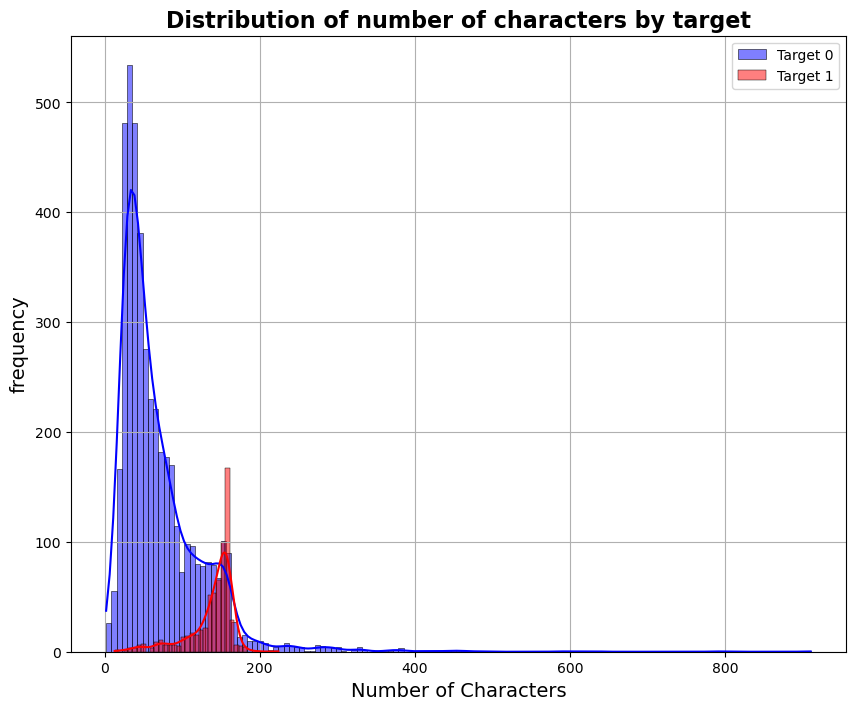

In [68]:
# character Length Distrinution for spam sms

plt.figure(figsize=(10, 8))
sns.histplot(df[df['target'] == 0]['num character'], color='blue', kde=True, label='Target 0')
sns.histplot(df[df['target'] == 1]['num character'], color='red', kde=True, label='Target 1')

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title("Distribution of number of characters by target", fontsize=16, fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

# Pairplot for Data Visualization

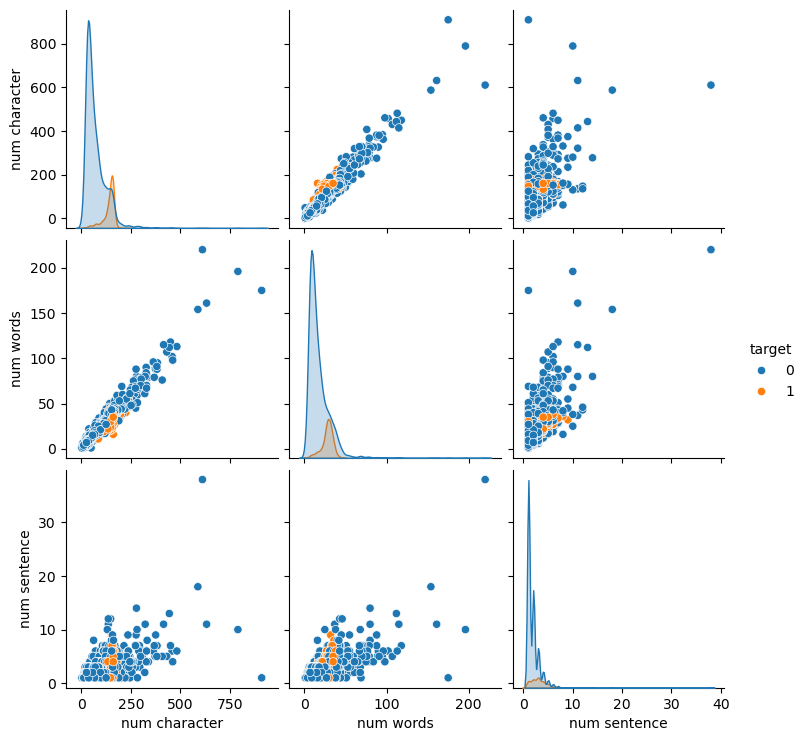

In [69]:
sns.pairplot(df, hue='target')

In [70]:
# correlation

df[['target', 'num character', 'num words', 'num sentence']].corr()

,target,num character,num words,num sentence
target,1.000000,0.384717,0.262912,0.263939
num character,0.384717,1.000000,0.965760,0.624139
num words,0.262912,0.965760,1.000000,0.679971
num sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

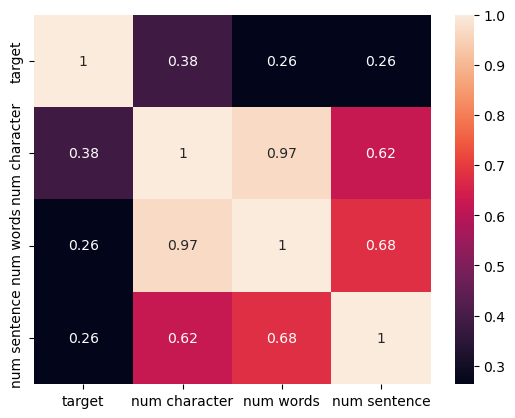

In [71]:
corr_matrix = df[['target', 'num character', 'num words', 'num sentence']].corr()

sns.heatmap(corr_matrix, annot=True)

# Data Preprocesing


In [72]:
# Importing the porter stemmer for text steaming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

ps = PorterStemmer()

def transform_text(text):
    # Transfomr of text to lower
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing the special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Look through the tokens and remove stopwords and punctuations
    for i  in text:
        if i not in stopwords.words('english') and i not  in string.punctuation:
            y.append(i)

    # Stemming using porter Stemmer

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))


    # Join the processing token back into a single string

    return " ".join(y)


    

In [73]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [74]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [75]:
df['transform_text'] = df['text'].apply(transform_text)

C:\Users\vikram\AppData\Local\Temp\ipykernel_21508\360176214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['text'].apply(transform_text)


In [76]:
df

,target,text,num character,num words,num sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Word Cloud for Spam sms

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width =  500, height = 500, min_font_size= 10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Word Cloud for Not Spam sms

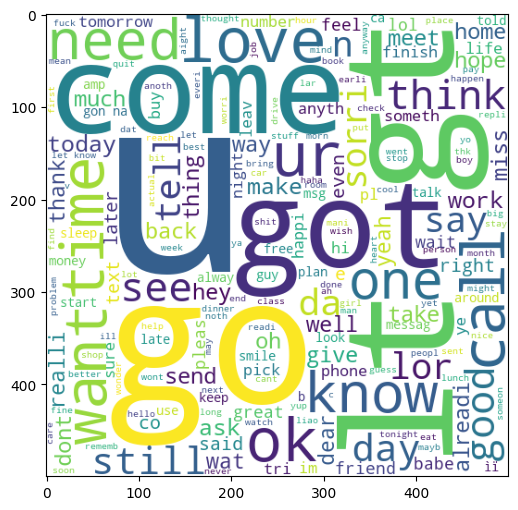

In [ ]:
wc = WordCloud(width =  500, height = 500, min_font_size= 10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = " "))
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)
plt.show()

# Model Building

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
vectorizer  = TfidfVectorizer(max_features=3000)

In [79]:
X = vectorizer.fit_transform(df['transform_text']).toarray()
y = df['target'].values


In [81]:
with open('vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer, f)

# split into train and test data

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Import the Models

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Initialize the model

In [46]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )




# Dictionary of the Models

In [47]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    
}

In [48]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [49]:
accuracy_scores = []
precision_scores = []
for name , clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9709864603481625
Precision:  1.0

For:  DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119

For:  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703


# Conclusion:
- In our evaluation of various classification algorithms, we observed the following key insights:

- Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97.58%.

- Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.

- Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy   scores ranging from 94.68% to 96.03%.

- The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice.

In [50]:
best_model = mnb.fit(X_train, y_train)

In [51]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(best_model, f)